# Predict Movie Box Office Revenue with Linear Regression

## Formulate the Question

How much revenue will the movie make?
Can we use movie budget to predict movie revenue?
- We will look to see if movie budget will determine how much revenue the movie will make..
- Target will be revenue and budget will be the feature
- Only using Top 100 movies

### Gather the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('movie_report.csv')
data

,Released,Title,production_budget,domestic_gross,international_gross,worldwide_gross
0,18-Dec-15,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,1.127954e+09,2.064616e+09
1,26-Apr-19,Avengers: Endgame,400000000.0,858373000.0,1.939359e+09,2.797732e+09
2,17-Dec-21,Spider-Man: No Way Home,200000000.0,814108407.0,1.095933e+09,1.910042e+09
3,18-Dec-09,Avatar,237000000.0,785221649.0,2.114162e+09,2.899384e+09
4,27-May-22,Top Gun: Maverick,170000000.0,718732821.0,7.700000e+08,1.488733e+09
...,...,...,...,...,...,...
95,15-Jul-09,Harry Potter and the Half-Blood Prince,250000000.0,302089278.0,6.273218e+08,9.294111e+08
96,30-Jun-10,The Twilight Saga: Eclipse,68000000.0,300531751.0,4.055711e+08,7.061028e+08
97,20-Nov-09,The Twilight Saga: New Moon,50000000.0,296623634.0,3.909341e+08,6.875577e+08
98,19-Nov-10,Harry Potter and the Deathly Hallows:…,125000000.0,296131568.0,6.556361e+08,9.517677e+08


### Getting rid of all data that doesnt matter
- released date, title is not needed

In [3]:
data.drop(columns=['Released','Title'], inplace=True)

### Checking for NA values within the dataset, gtg!

In [4]:
data.isna().sum()

production_budget      0
domestic_gross         0
international_gross    0
worldwide_gross        0
dtype: int64

### Data Exploration

In [5]:
data.describe()

,production_budget,domestic_gross,international_gross,worldwide_gross
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.581930e+08,4.164384e+08,6.324637e+08,1.048902e+09
std,7.772182e+07,1.316440e+08,3.129517e+08,4.123398e+08
min,0.000000e+00,2.935063e+08,1.659003e+08,4.751054e+08
25%,9.400000e+07,3.303079e+08,4.331657e+08,7.965020e+08
50%,1.700000e+08,3.747668e+08,5.613692e+08,9.572662e+08
75%,2.000000e+08,4.353413e+08,7.356466e+08,1.130209e+09
max,4.000000e+08,9.366622e+08,2.114162e+09,2.899384e+09


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   production_budget    100 non-null    float64
 1   domestic_gross       100 non-null    float64
 2   international_gross  100 non-null    float64
 3   worldwide_gross      100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


In [7]:
data.head()

,production_budget,domestic_gross,international_gross,worldwide_gross
0,306000000.0,936662225.0,1.127954e+09,2.064616e+09
1,400000000.0,858373000.0,1.939359e+09,2.797732e+09
2,200000000.0,814108407.0,1.095933e+09,1.910042e+09
3,237000000.0,785221649.0,2.114162e+09,2.899384e+09
4,170000000.0,718732821.0,7.700000e+08,1.488733e+09


In [11]:
X = data[['production_budget']]
y = data['worldwide_gross']

### Scatterplot of production budget (x), global revenue (y)

(0.0, 450000000.0)

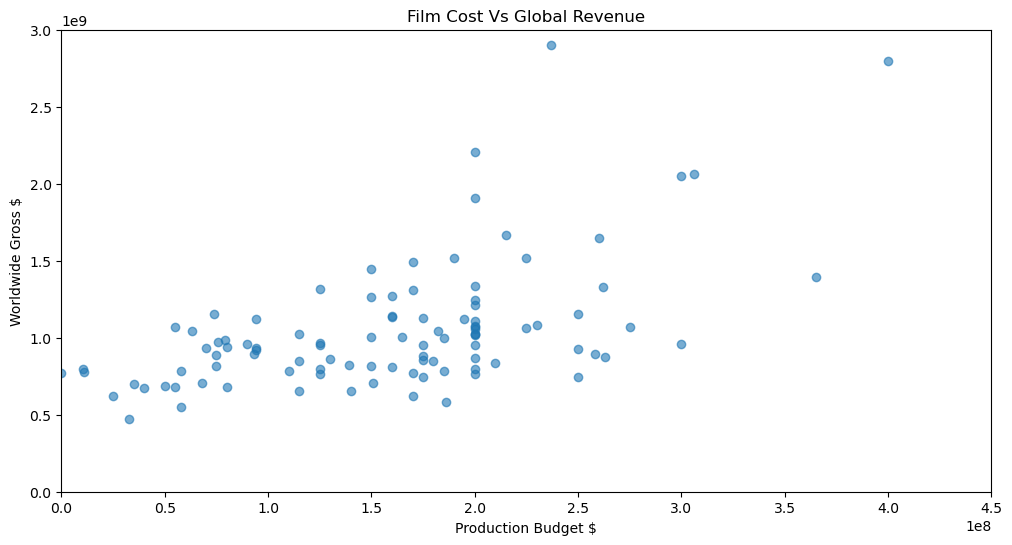

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(X,y, alpha=0.6)
plt.title('Film Cost Vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

instatinating an object of linear regression from sklearn and fitting production budget, worldwide gross

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

slope coefficient:

In [14]:
model.coef_

array([2.95772309])

intercept:

In [15]:
model.intercept_

581011010.4003456

### Scatterplot of production budget (x), global revenue (y) w/ line of best fit

(0.0, 450000000.0)

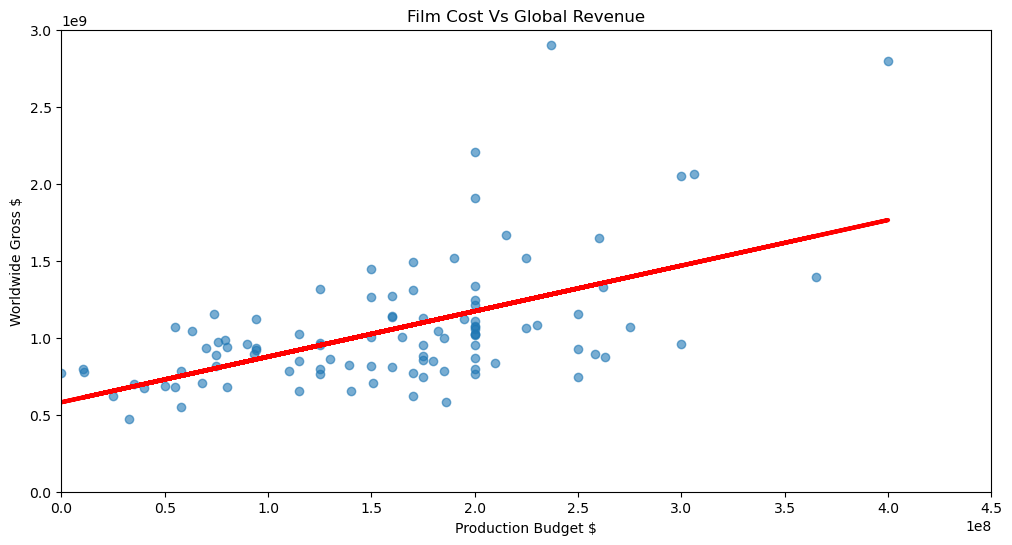

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(X,y, alpha=0.6)
plt.plot(X, model.predict(X), color='red', linewidth=3)
plt.title('Film Cost Vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

Shows that this model does not follow the movement of the realworld data. But this model was only built on 100 top movies with a few outliers, like the Avengers and Avatar.

In [23]:
model.score(X,y)

0.31080681064339377